# Project 3 - App to Forecast IPO market

A IPO is called an Initial Public Offereing, it is where companies will offer the public to buy in on shares of the company. Buying into an IPO can be a great opportunity for investment depending on the market and its influences. This project aims to use machine learning techniques to aid in the decision of which IPOs are worth a closer look and which ones are not. 

The breakdown of this project are:
- Learning about the IPO market
- Data cleaning and feature engineering
- Logistic Regression to perform Binary classification
- Model Evaluation
- Feature importance


## 1 The IPO Makert:

Before getting starting or diving right into coding, it is important to learn or establish some ideas/knwoledge about the tpoic of interest, where in this case, it is the IPO market. 

#### Lets begin with What is an IPO?

Well, it is when a private company turns into a public company. It is a way to raise capital and provides an opportunity to invest in the company. Companies can do this by enlisting the aid of one or more investment institutions/banks to underwrite the company's offering. To clarify, this means that the banks will make a guarantee to puchase all the shares offered at the IPO price on the day and head out for a roadshow. The purpose of the roadshow is to gain interest from institutional clients where they would subscribe for the shares, this means that they indicate interest in buying the shares on the day of openning. The underwriter then set the offer or IPO price which is dependent on the level of interest.

Another interesting feature is that there seem to be a systematic underpricing of IPOs where billions of dollars are left on the table. Money left on the table can be described as the difference betwen the offer price and the first day's closing price. Additionally, to get a better deal than the opening price requires a broker on your behalf, otherwise you'll pay the higher (opening) price. 

The model here would be built under these assumptions.

#### Data:

The data is recent and sourced from https://www.iposcoop.com/scoop-track-record-from-2000-to-present/. It is downloaded and saved into a folder. Note that it is not possible to read the data with 'Pandas' package, so the 'xlrd' package is used instead.

## 2 Import the required libraries:

In [1]:
import numpy as np
import pandas as pd
import xlrd
import os
import datetime

import matplotlib.pyplot as plt 
%matplotlib inline

## 3 Load in the excel workbook:

In [2]:
ipo_data = 'SCOOP-Rating-Performance.xls'

ipo_folder = os.path.dirname(os.path.realpath(ipo_data))
ipo_file = os.path.realpath(ipo_data)
file_path = ipo_folder + '/IPO Data/'

print(file_path)


ipo_wb = xlrd.open_workbook(file_path + ipo_data)

C:\Users\yewsh\OneDrive\Packt - Python Machine Learning Blue Prints\Project 3 - App to Forecast IPO market/IPO Data/


In [3]:
# Select the worksheet to work with:
ipo_worksheet = ipo_wb.sheet_by_index(0)

In [4]:
ipo_worksheet.nrows

3575

#### After examining and comparing the no. of rows above to the Excel workbook, everything seems to be consistent.

### 3.1 Incorporating the Data: row by row

Note that the data of interest starts from the row 36 and onwards. It will also include column names.

A loop is created to save each row in the spreadsheet, it firstly checks if the first value from the workbook is a float and if yes, it will add all the cell's values to the ipo_list. This will take into account that the Date column is a float and is of interest for this project. 

In [5]:
ipo_list = []

for i in range(36, ipo_worksheet.nrows):
    if isinstance(ipo_worksheet.row(i)[0].value, float):
        ipo_list.append([x.value for x in ipo_worksheet.row(i)])
    else:
        print(i, ipo_worksheet.row(i))

36 [text:'Date', text:'Issuer', text:'Symbol', text:' Managers', text:'Price', text:'Price', text:'Close', text:'% Px Chng ', text:'Opening', text:'Close', text:'Ratings', text:'Performed']
37 [empty:'', number:2020.0, empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
44 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
45 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
46 [text:'Trade', empty:'', empty:'', text:'Lead/Joint-Lead', text:'Offer', text:'Opening', text:'1st Day', text:'1st Day', text:'$ Change', text:'$ Change', text:'Star', empty:'']
47 [text:'Date', text:'Issuer', text:'Symbol', text:' Managers', text:'Price', text:'Price', text:'Close', text:'% Px Chng ', text:'Opening', text:'Close', text:'Ratings', text:'Performed']
48 [empty:'', number:2019.0, empty:'', empty:'', empty:'', emp

In [6]:
len(ipo_list)

3433

### 3.2 Save the extracted ipo_list as a DataFrame:

In [7]:
df_ipo = pd.DataFrame(ipo_list)
df_ipo.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,43847.0,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.0892857,0.75,-1.25,2,
1,43847.0,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.0572727,0.03,0.63,1,
2,43847.0,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0,0.00,0.00,1,
3,43847.0,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.0392308,0.85,0.51,1,
4,43854.0,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1,


From the above, inspection of the dataframe, the residing information/data looks good.

#### Next, add the columns to the dataframe:

In [8]:
df_ipo.columns = ['Date', 'Company', 'Ticker', 'Managers', 
                  'Offer Price', 'Opening Price', '1st Day Close', 
                  '1st Dy % Chg', '$ Chg Open', '$ Chg Close', 'Star Rating', 'Performed']

In [9]:
df_ipo.head()

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Dy % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed
0,43847.0,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.0892857,0.75,-1.25,2,
1,43847.0,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.0572727,0.03,0.63,1,
2,43847.0,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0,0.00,0.00,1,
3,43847.0,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.0392308,0.85,0.51,1,
4,43854.0,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1,


#### Convert the Date column from float to datetime:

In [10]:
def to_date(x):
    date = xlrd.xldate.xldate_as_datetime(x, ipo_wb.datemode)
    return date

In [11]:
df_ipo['Date'] = df_ipo['Date'].apply(to_date)
df_ipo.head()

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Dy % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.0892857,0.75,-1.25,2,
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.0572727,0.03,0.63,1,
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0,0.00,0.00,1,
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.0392308,0.85,0.51,1,
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1,


#### Next, add additional dates: split up the date format.

In [12]:
df_ipo['Year'], df_ipo['Month'], df_ipo['Day'], df_ipo['Day of Week'] = df_ipo['Date'].dt.year, df_ipo['Date'].dt.month, df_ipo['Date'].dt.day, df_ipo['Date'].dt.weekday

In [13]:
df_ipo.head()

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Dy % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.0892857,0.75,-1.25,2,,2020,1,17,4
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.0572727,0.03,0.63,1,,2020,1,17,4
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0,0.00,0.00,1,,2020,1,17,4
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.0392308,0.85,0.51,1,,2020,1,17,4
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1,,2020,1,24,4


#### Comapre the dataFrame to the original Excel worksheet:

In [14]:
by_year_count = df_ipo.groupby('Year')[['Ticker']].count()
by_year_count

,Ticker
Year,
2000,237
2001,94
2002,82
2003,80
2004,233
2005,226
2006,237
2007,256
2008,47


After comparison, the values shown are consistent.

### 3.3 Check for Penny Stock (very low-priced stocks): and Drop them.

In [15]:
df_ipo.drop(df_ipo[df_ipo['Offer Price'] < 5].index, inplace = True)
df_ipo.reset_index(drop = True, inplace = True)

df_ipo.dtypes

Date             datetime64[ns]
Company                  object
Ticker                   object
Managers                 object
Offer Price             float64
Opening Price           float64
1st Day Close           float64
1st Dy % Chg             object
$ Chg Open              float64
$ Chg Close             float64
Star Rating              object
Performed                object
Year                      int64
Month                     int64
Day                       int64
Day of Week               int64
dtype: object

From the above inspection, the '1st Dy % Chg' column is an object, but it is required to be in Float format.

In [16]:
df_ipo['1st Dy % Chg'] = df_ipo['1st Dy % Chg'].astype(float)
df_ipo.dtypes

Date             datetime64[ns]
Company                  object
Ticker                   object
Managers                 object
Offer Price             float64
Opening Price           float64
1st Day Close           float64
1st Dy % Chg            float64
$ Chg Open              float64
$ Chg Close             float64
Star Rating              object
Performed                object
Year                      int64
Month                     int64
Day                       int64
Day of Week               int64
dtype: object

## 4 Exploratory Data Analysis:

EDA on the IPO data since the year 2000.

#### Plot of the IPOs (100s) in the most recent years:

Text(0.5, 1.02, 'IPO Count by Year')

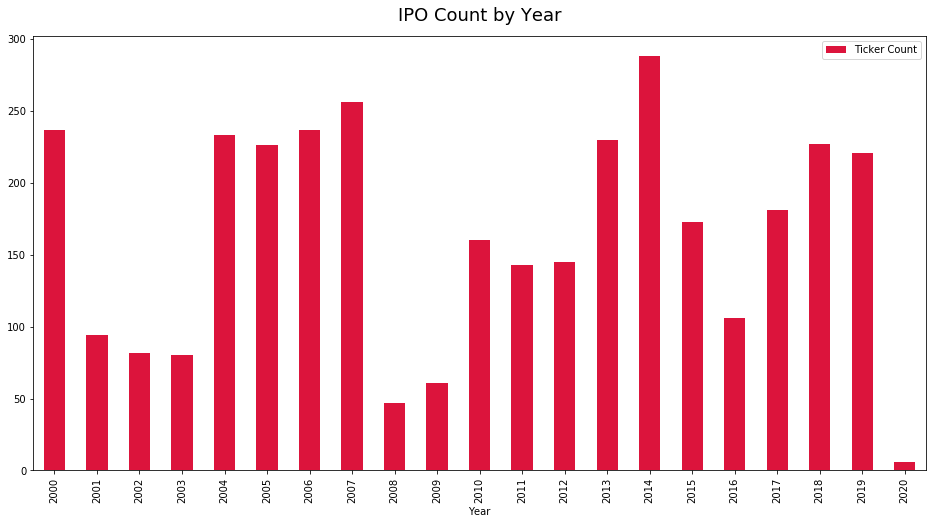

In [17]:
# Initial plot:

fig, ax = plt.subplots(figsize = (16, 8))
by_year_count.plot(kind = 'bar', ax = ax, color = 'crimson')
ax.legend(['Ticker Count'])
ax.set_title('IPO Count by Year', fontdict = {'size': 18}, y = 1.02)

#### Summary of the performance of the Stocks:

In [18]:
summary_byYear = df_ipo.groupby('Year')['1st Dy % Chg'].describe()
summary_byYear

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000,237.0,0.355621,0.557065,-0.269231,0.004464,0.162500,0.470052,2.775000
2001,93.0,0.130180,0.160606,-0.140625,0.011538,0.088542,0.229167,0.766667
2002,82.0,0.072315,0.141903,-0.330769,0.000000,0.045959,0.135866,0.666667
2003,79.0,0.120958,0.164613,-0.155455,0.002857,0.074286,0.230264,0.885556
2004,233.0,0.107347,0.165334,-0.142500,0.000000,0.052083,0.169231,1.036364
2005,226.0,0.099110,0.274405,-0.164000,0.000000,0.025357,0.143803,3.538519
2006,236.0,0.099694,0.176282,-0.295455,0.000000,0.041652,0.150852,1.254068
2007,256.0,0.115215,0.206049,-0.269091,0.000000,0.033571,0.179853,0.972222
2008,47.0,0.023182,0.134953,-0.199200,-0.034857,0.000000,0.028873,0.575000


From the above, it can be seen that the year 2000, there were a lot of IPOs at 237 companies, and on average provided a return of 35.5%. This is more than double when compared to all the remaining year on the list. Additionally, it can be seen that every year has had a positive average return for the first day performance.

#### Next, plot the first day performance:

Text(0.5, 1.02, 'Average First Day % Change by Year')

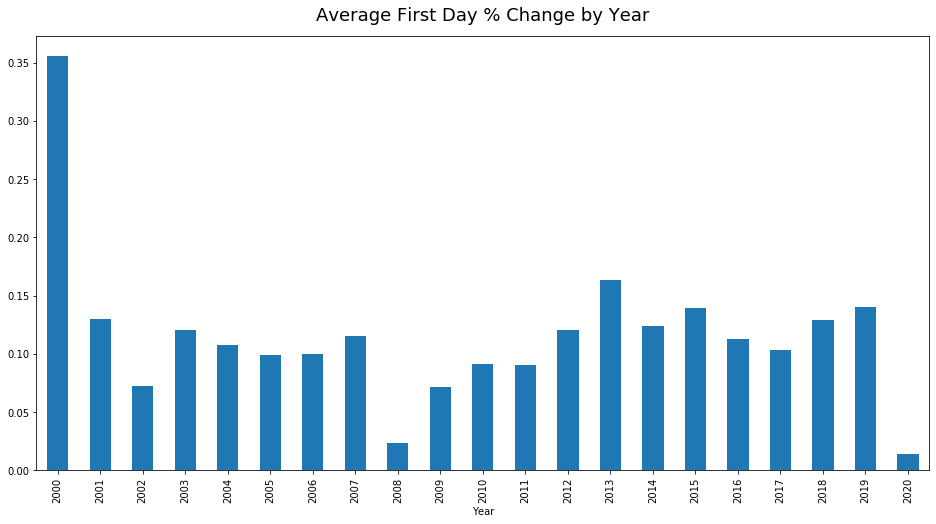

In [19]:
fig, ax = plt.subplots(figsize = (16, 8))
summary_byYear['mean'].plot(kind = 'bar', ax = ax)
ax.set_title('Average First Day % Change by Year', fontdict = {'size': 18}, y = 1.02)

It should be noted that the first day preformance only relates to investors who purchase the shares (offerings) before the IPO day.

The first day return that relates to the general public is received as the difference between the opening price and the closing price.

#### Next add aonther column to the dataframe: to define the price difference for the general public

In [20]:
df_ipo['1st Day Open to Close % Chg'] = (df_ipo['1st Day Close'] - df_ipo['Opening Price']) / df_ipo['Opening Price']

In [21]:
df_ipo['1st Day Open to Close % Chg'].describe()

count    3404.000000
mean        0.013652
std         0.114836
min        -0.492812
25%        -0.028842
50%         0.000000
75%         0.040000
max         2.173653
Name: 1st Day Open to Close % Chg, dtype: float64

Taking a look at the average return value at 0.013 (or 1.3%), it shows that it is less lucrative in terms of returns.

Text(0.5, 1.02, 'Average 1st Day Open to Close % Change by Year')

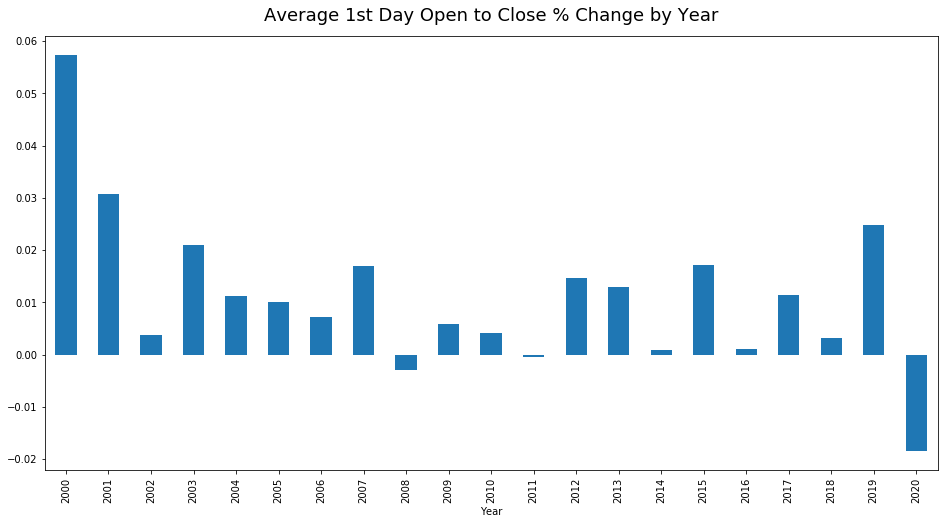

In [22]:
fig, ax = plt.subplots(figsize=(16,8))
df_ipo.groupby('Year')['1st Day Open to Close % Chg'].mean().plot(kind = 'bar', ax = ax)
ax.set_title('Average 1st Day Open to Close % Change by Year', fontdict = {'size': 18}, y = 1.02)

It can be seen from the plot above that the annual average returns for the general public, whom have traded on the first day will have lower returns. This can be seen when compared with the previous plot.

## 5 Determine a Baseline IPO strategy:

The baseline here would be to buy every IPO listings at their opening tick/price and this would be followed by selling the share at their closing price. The idea is to find out if the returns are good or bad in terms of dollars earned.

### 5.1 Actual dollar price changes between open to close prices:

In [23]:
df_ipo['1st Day Open to Close $ Chg'] = (df_ipo['1st Day Close'] - df_ipo['Opening Price'])

In [24]:
df_ipo[df_ipo['Year'] == 2019].sum()

Offer Price                      3223.170000
Opening Price                    3725.795000
1st Day Close                    3801.278000
1st Dy % Chg                       30.324850
$ Chg Open                        502.625000
$ Chg Close                       576.008000
Year                           436104.000000
Month                            1463.000000
Day                              3341.000000
Day of Week                       650.000000
1st Day Open to Close % Chg         5.358402
1st Day Open to Close $ Chg        75.483000
dtype: float64

In [25]:
df_ipo[df_ipo['Year'] == 2019]['1st Day Open to Close $ Chg'].describe()

count    216.000000
mean       0.349458
std        2.991585
min       -8.950000
25%       -0.447500
50%        0.000000
75%        0.770000
max       19.750000
Name: 1st Day Open to Close $ Chg, dtype: float64

In [26]:
# Average 1st-day gain per IPO:

3725.79/216

17.249027777777776

From the two tables above, it can be seen that the first day open-to-close price (Dollars) have a total that is around $37, where it is also over 216 IPOs until the year 2020. It was also calculated that the average 1st-day gain is about 17 cents per IPO. 

It should be noted that this is under ideal conditions where the transaction costs and slippage are ignored.

Note: Slippage is the difference between the attempted entry/exit price for the target stock and the price the order was actually fulfilled.

## 5.2 Plot the distribution of the Returns from these IPO:

The idea is to better understand how to improve the returns from the baseline naive bayes strategy of just purchasing every IPO that ever were.

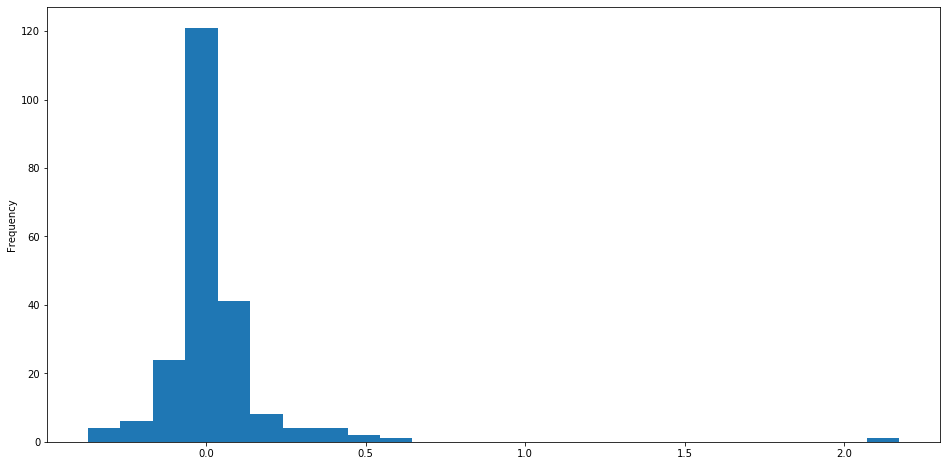

In [27]:
fig, ax = plt.subplots(figsize = (16, 8))
df_ipo[df_ipo['Year'] == 2019]['1st Day Open to Close % Chg'].plot(kind = 'hist', bins = 25, ax = ax)

From the histogram plot above, it can be seen that most of the returns are centred around zero (at around 120), there is however a slightly long tail on the right side of the histogram. This is where some positive returns can be found. From this, it would be financially rewarding if some of the commonalities can be identified  amongst these IPOs and it can then be capitalised on. 

## 6 Data Cleaning and Feature Engineering:

This section of feature engineering will allow the model to take into account features such as:
- The impact on the performance of an offering as it begins to be traded.
- The performance of the market in general that will influence the outcome, or would it be the prestige of the underwriters?
- It could be the day of the week or month that the IPO trades on.

The features should be data that consist of important/informative value to improve the model.

### 6.1 Adding Features: Opening Gap

Opening gap is the difference between the offer price and opening price of the issue.

In [28]:
df_ipo['Opening Gap % Chg'] = (df_ipo['Opening Price'] - df_ipo['Offer Price']) / df_ipo['Offer Price']

### 6.2 Adding Features: Count of the no. of underwriters on the offering

Assumption here is that the more banks that are involved would lead to a better marketing of the issue.

In [29]:
def get_mgr_count(x):
    return len(x.split('/'))

In [30]:
df_ipo['Mgr Count'] = df_ipo['Managers'].apply(get_mgr_count)

#### Inspect this hypothesis by plotting a graph:

In [31]:
df_ipo.groupby('Mgr Count')['1st Day Open to Close % Chg'].mean().to_frame().style.bar(align = 'mid', color = ['#d65f5f', '#5fba7d'])

,1st Day Open to Close % Chg
Mgr Count,
1,0.0168992
2,0.012785
3,0.0112038
4,0.0178267
5,0.00760132
6,-0.00688839
7,0.00168384
8,0.00378158
9,0.0322541


Although the relationship between no. of underwriters and the IPO price may not be apparent, however it can also clearly show that 9 bankers/underwriters shows the greatest change and is the sweet spot.

#### Extract the first underwriter in the list: 

This may lead to the prestige of the bank and it may be important to the 1st-day gains.

In [32]:
df_ipo['Managers']

0                                         Jefferies/ CICC
1                                Credit Suisse/ Citigroup
2                   Citigroup/ Credit Suisse/ J.P. Morgan
3       Wells Fargo Securities/ Citigroup/ JMP Securities
4                                Deutsche Bank Securities
5                                           Credit Suisse
6                       Cowen/ Craig-Hallum Capital Group
7       UBS Investment Bank/ BofA Merrill Lynch/ Morga...
8                                Morgan Stanley/ Barclays
9                                                  Cantor
10      Deutsche Bank Securities/ Credit Suisse/ Goldm...
11                                                Chardan
12      Morgan Stanley/ BofA Merrill Lynch/ Cowen/ Bar...
13                                         Cowen/ Chardan
14      BofA Merrill Lynch/ Leerink Partners/ Barclays...
15                            Citigroup/ Leerink Partners
16                               Deutsche Bank Securities
17            

In [33]:
df_ipo['Lead Mgr'] = df_ipo['Managers'].apply(lambda x: x.split('/')[0])

In [34]:
df_ipo['Lead Mgr']

0                         Jefferies
1                     Credit Suisse
2                         Citigroup
3            Wells Fargo Securities
4          Deutsche Bank Securities
5                     Credit Suisse
6                             Cowen
7               UBS Investment Bank
8                    Morgan Stanley
9                            Cantor
10         Deutsche Bank Securities
11                          Chardan
12                   Morgan Stanley
13                            Cowen
14               BofA Merrill Lynch
15                        Citigroup
16         Deutsche Bank Securities
17          Dawson James Securities
18               BofA Merrill Lynch
19                        Jefferies
20      Laidlaw & Company (UK) Ltd.
21                        Jefferies
22                    Goldman Sachs
23                Northland Capital
24         Deutsche Bank Securities
25                    Goldman Sachs
26                         Barclays
27                          

In [35]:
df_ipo['Lead Mgr'].unique()

array(['Jefferies', 'Credit Suisse', 'Citigroup',
       'Wells Fargo Securities', 'Deutsche Bank Securities', 'Cowen',
       'UBS Investment Bank', 'Morgan Stanley', 'Cantor', 'Chardan',
       'BofA Merrill Lynch', 'Dawson James Securities',
       'Laidlaw & Company (UK) Ltd.', 'Goldman Sachs',
       'Northland Capital', 'Barclays', 'Nomura', 'EarlyBirdCapital',
       'Goldman Sachs (Asia)', 'BTIG', 'J.P. Morgan', 'Maxim Group',
       'B. Riley FBR', 'Credit Suiss', 'FIG Partners', 'SVB Leerink',
       'Baird', 'Keefe, Bruyette & Woods (A Stifel Company)',
       'Roth Capital Partners', 'Oppenheimer', 'Maxim Group LLC',
       'Stifel', 'I-Bankers Securities', 'J.P. Morgan Securities',
       'DPO (Direct Public Offering)', 'BMO Capital Markets',
       'AMTD Global Markets', '\u200bBarclays', '\u200bJ.P. Morgan',
       'Univest Securities', 'National Securities',
       'I-Bankers Securities ', 'Raymond James',
       'ThinkEquity (a division of Fordham Financial Management)

By inspecting the list of the underwriters/banks above, many of the names are replicated with different spellings and punctuation. This means that there will be a need to clean up the data further. For now, this will be ignored and hope that it wont have a huge impact on the model.

## 7 Binary Classification: with Logistic Regression.

Rather than predicting the total 1st-day return itself, it is better to attempt to predict whether the IPO should be a 'buy' or 'not'. To do this, the Logistic Regression model will be used. 

For more information: 
- https://machinelearningmastery.com/logistic-regression-for-machine-learning/
- https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148

### 7.1 Import the required Package:

In [36]:
from patsy import dmatrix



### 7.2  First, create a Target column: 

This column to help the model learn whether each IPO should be invested or not. Next, how does the model know which is an IPO that is a good investment or not, this can be determined by setting the threshold for return to be in the positive of 2.5%. Meaning that any IPO that is able to provide a 2.5% return on day one is a good choice. The 2.5% chosen here is an arbitrary number. 

In [39]:
df_ipo.head()

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Dy % Chg,$ Chg Open,$ Chg Close,...,Performed,Year,Month,Day,Day of Week,1st Day Open to Close % Chg,1st Day Open to Close $ Chg,Opening Gap % Chg,Mgr Count,Lead Mgr
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,...,,2020,1,17,4,-0.135593,-2.00,0.053571,2,Jefferies
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,...,,2020,1,17,4,0.054397,0.60,0.002727,2,Credit Suisse
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.000000,0.00,0.00,...,,2020,1,17,4,0.000000,0.00,0.000000,3,Citigroup
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,...,,2020,1,17,4,-0.024549,-0.34,0.065385,3,Wells Fargo Securities
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045000,0.52,0.45,...,,2020,1,24,4,-0.006654,-0.07,0.052000,1,Deutsche Bank Securities


In [40]:
y_target = df_ipo['1st Day Open to Close % Chg'].apply(lambda x: 1 if x > 0.025 else 0)

#### Next is to set up the predictor variables:

The Qs and Cs found below:
- Qs are used to provide quotes for the formula, for the columns that have white space in their names.
- Cs are used to indicate the referenced column to be treated as categorical featues and should be dummy-coded.

In [42]:
X_predictors = dmatrix("Q('Opening Gap % Chg') + C(Q('Month'), Treatment) + C(Q('Day of Week'), Treatment) + Q('Mgr Count') + Q('Lead Mgr') + Q('Offer Price') + C(Q('Star Rating'), Treatment)", df_ipo, return_type = 'dataframe')

#### Inpect the Dummy coding of the X_predictors:

In [43]:
X_predictors

,Intercept,"C(Q('Month'), Treatment)[T.2]","C(Q('Month'), Treatment)[T.3]","C(Q('Month'), Treatment)[T.4]","C(Q('Month'), Treatment)[T.5]","C(Q('Month'), Treatment)[T.6]","C(Q('Month'), Treatment)[T.7]","C(Q('Month'), Treatment)[T.8]","C(Q('Month'), Treatment)[T.9]","C(Q('Month'), Treatment)[T.10]",...,Q('Lead Mgr')[T.​J.P. Morgan],Q('Lead Mgr')[T.​Jefferies],"C(Q('Star Rating'), Treatment)[T.2.0]","C(Q('Star Rating'), Treatment)[T.3.0]","C(Q('Star Rating'), Treatment)[T.4.0]","C(Q('Star Rating'), Treatment)[T.5.0]","C(Q('Star Rating'), Treatment)[T.N/C]",Q('Opening Gap % Chg'),Q('Mgr Count'),Q('Offer Price')
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.053571,2.0,14.0000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002727,2.0,11.0000
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.0,13.5000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065385,3.0,13.0000
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052000,1.0,10.0000
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030000,1.0,10.0000
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.0,10.0000
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.0,20.0000
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.053571,2.0,14.0000
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005000,1.0,10.0000


## 7.3 Fitting the Model:

With both the X_predictors and y_target ready, it is time to fit the model by using the train/test split method and to train the model on all the 200 IPOs except the last one.

#### Import the model from the package:

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
# Creating the training data set:
X_train = X_predictors[:-200]
y_train = y_target[:-200]

# Creating the Test data set:
X_test = X_predictors[-200:]
y_test = y_target[-200:]

In [46]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\yewsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## 8 Check out the Model performance:

The model will now be used to test the data and the results from it will be examined to see whether the predictions were correct. 